Lab 1
---

**Imports:**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ds_salary = pd.read_csv("https://richardson.byu.edu/220/ds_salary.csv")

**General Salary Data:** Start by plotting and describing the general shape of the salary data. This initial step sets the foundation for your analysis.

Median: 110000.0
The salary data has a right skewed shape and peaks around 100,000.


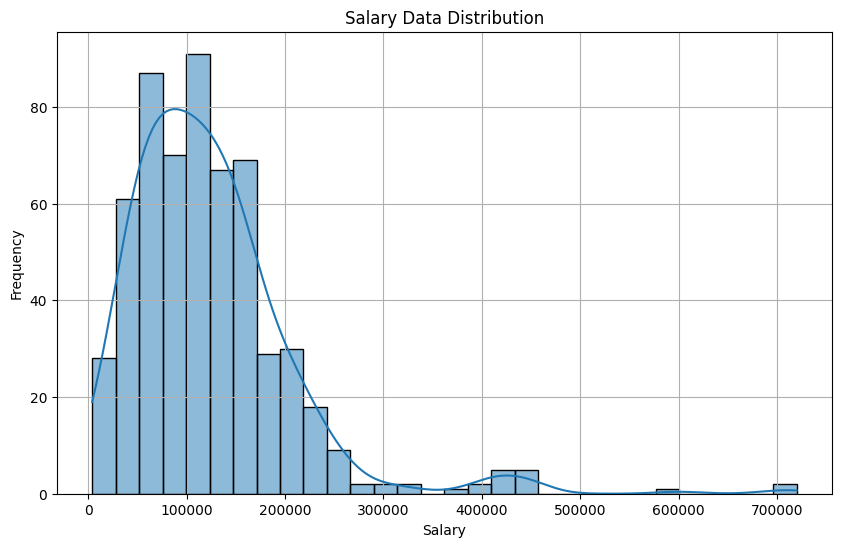

In [16]:
median = np.median(ds_salary["salary"])
print(f"Median: {median}")
print("The salary data has a right skewed shape and peaks around 100,000.")

plt.figure(figsize=(10,6))
sns.histplot(ds_salary['salary'], bins=30, kde=True)
plt.title('Salary Data Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Effect of Experience on Salary**: Investigate how experience influences data scientist salaries. Create visualizations or tables to illustrate any trends or patterns.

<BarContainer object of 149 artists>

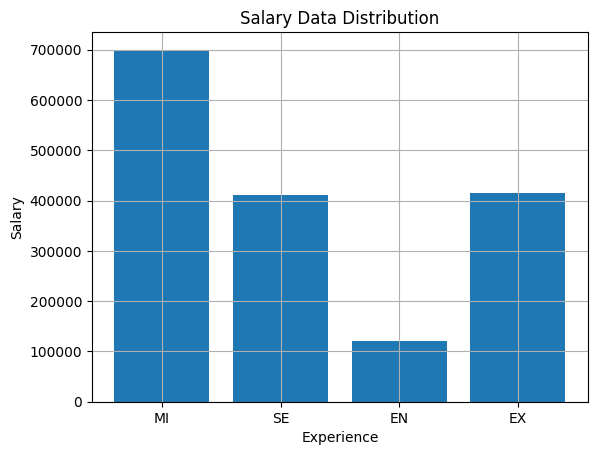

In [17]:
plt.title('Salary Data Distribution')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid(True)
scientist = ds_salary[ds_salary['job_title'].str.contains("Data Scientist")]
plt.bar(scientist['experience_level'], scientist['salary'])

**Impact of Company Size on Salary:** Explore how company size affects data scientist salaries. Generate plots or tables to
visualize this relationship.

<BarContainer object of 149 artists>

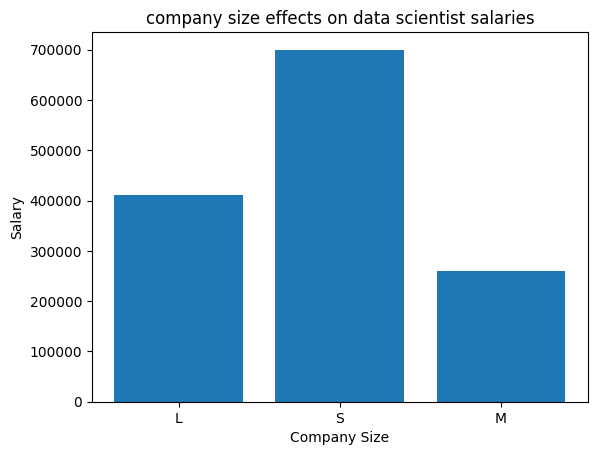

In [11]:
scientist = ds_salary[ds_salary['job_title'].str.contains("Data Scientist")]
plt.title('Company Size Effects on Data Scientist Salaries')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.bar(scientist['company_size'], scientist['salary'])

**Job Title Analysis:** Job titles can vary significantly. For this project, select a keyword or phrase to distinguish between different job titles. For instance, you can differentiate between job titles containing the word ”Analyst” and those that do not. To achieve this, you may
find the str.contains function in Pandas helpful. Refer to this resource for examples:
https://www.geeksforgeeks.org/python-pandas-series-str-contains. Explore
various job titles to decide on the keyword or phrase you want to focus on.

<BarContainer object of 3 artists>

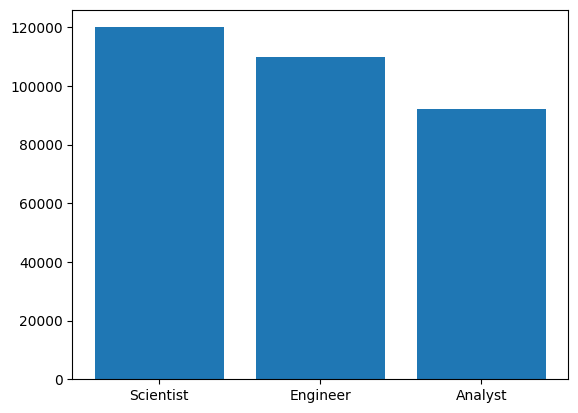

In [12]:
scientist = ds_salary[ds_salary['job_title'].str.contains("Scientist")]
Engineer = ds_salary[ds_salary['job_title'].str.contains("Engineer")]
Analyst = ds_salary[ds_salary['job_title'].str.contains("Analyst")]
# plt.plot(scientist['salary'])
# plt.plot(Engineer['salary'])
# plt.plot(Analyst['salary'])
plt.bar(['Scientist', 'Engineer', 'Analyst'], [scientist['salary'].median(), Engineer['salary'].median(), Analyst['salary'].median()])

**Interactions Between Relationships:** Investigate potential interactions between the three factors (experience, company size,
and job title). Create a two-way table that displays essential statistics at the intersection of two variables. For instance, construct a table with job titles on the left,
company sizes at the top, and each cell representing the mean salary for each job
title/company size combination.

                        job_title company_size         salary
0   3D Computer Vision Researcher            M  400000.000000
1                    AI Scientist            L  127500.000000
2                    AI Scientist            M   66000.000000
3                    AI Scientist            S  156000.000000
4              Analytics Engineer            M  175000.000000
..                            ...          ...            ...
91           Product Data Analyst            S   20000.000000
92             Research Scientist            L   98809.000000
93             Research Scientist            M  194333.333333
94             Research Scientist            S   49000.000000
95           Staff Data Scientist            M  105000.000000

[96 rows x 3 columns]


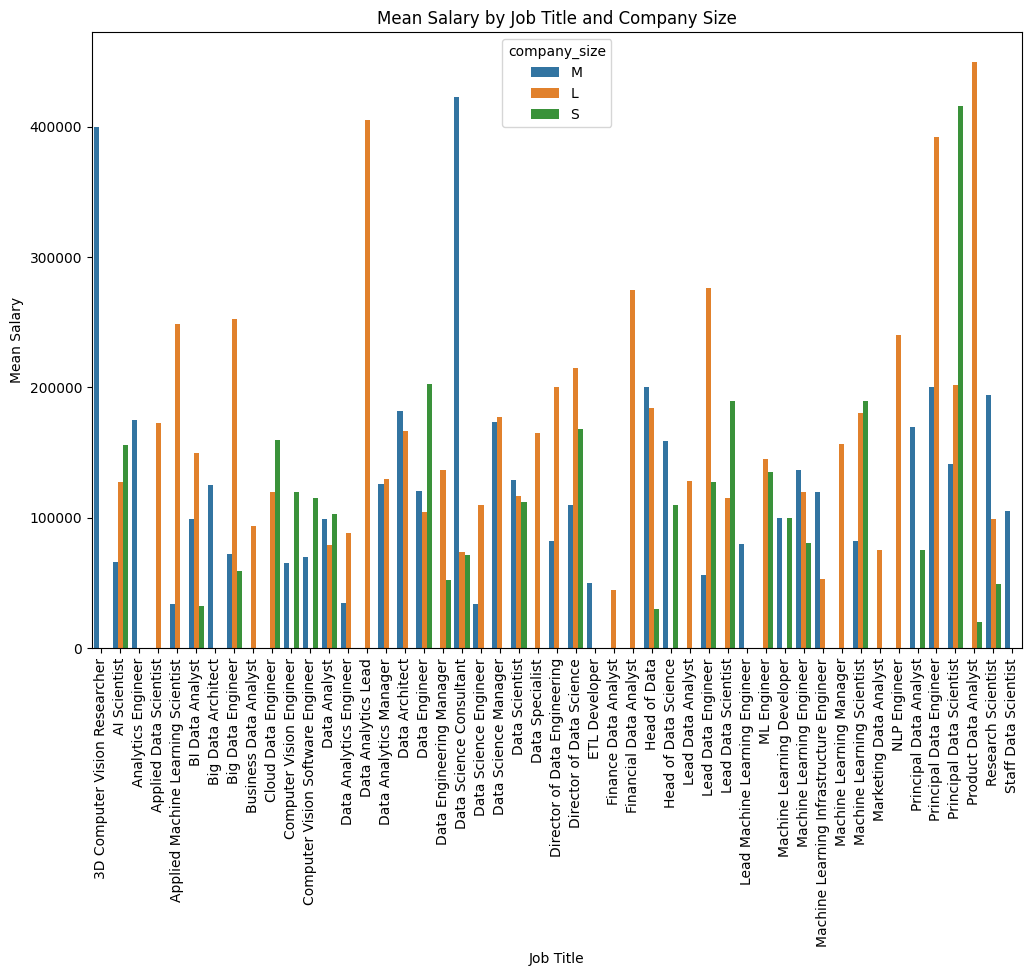

In [13]:
job_company_salary = ds_salary.groupby(['job_title', 'company_size'])['salary'].mean().reset_index()
print(job_company_salary)

#below is the code for a bar graph representing the above data
plt.figure(figsize=(12,8))
sns.barplot(x='job_title', y='salary', hue='company_size', data=job_company_salary)
plt.title('Mean Salary by Job Title and Company Size')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.xticks(rotation=90)
plt.show()

**Conclusion**: Summarize your findings by listing all significant relationships you have discovered
during your analysis.

During our analysis, we discovered that:

1. Salary data is skewed right, where the median salary is about $110,000.
2. For data scientists, entry level employees make the least, and smaller companies pay their employees more than large and medium companies. Large companies pay their employees more than medium companies.
3. Employees with the word "scientist" in their career name make the most, followed by "engineer" and then "analyst."
4. For large companies, principal data engineers are the highest paid. For medium sized companies, data science consultants are the highest paid, and for small companies, principal data scientists are paid the most.
